In [1]:
from sklearn.svm import LinearSVC, SVC,LinearSVR,SVR
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn import linear_model
from matplotlib.pyplot import MultipleLocator

In [2]:
df_fa = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_1.csv')
df_md = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_2.csv')
df_num = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_3.csv')
df_label = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_label.csv')
df_info = pd.read_csv(r'F:\Code\coupling\python\file\data\SDI_sub\sc_mode_info.csv')
df_mode= [df_fa,df_md,df_num]

SVR(C=0.9, degree=2, kernel='poly'), r= 0.4585042626086229, p = 1.7851434638136225e-42


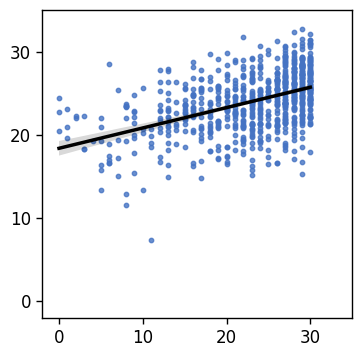

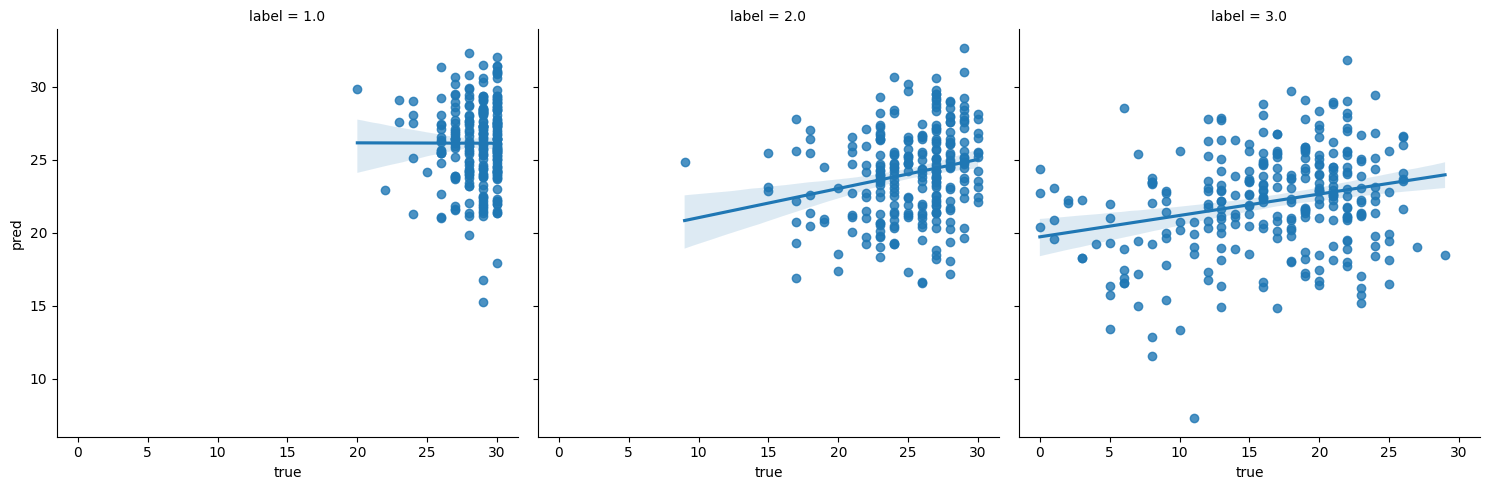

In [9]:

r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0
#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    label_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=1]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0

        label_mode.extend(df[df['center']== center]['label'].values)
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = SVR(C= 0.9, kernel= 'poly', degree=2)
        #model = linear_model.BayesianRidge()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(4, 4))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode,label_mode]), columns=['pred','true','label'])
    

    sns.regplot(data= df_y, x='true',y= 'pred',
                line_kws={'linewidth':2.5,"color": "black"}, 
                #color="black",
                scatter_kws = {'s':10, 'alpha' : 0.8, "color": '#4573c3'})
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)

    plt.xlim([-2,35])
    plt.ylim([-2,35])

    
    x_major_locator=MultipleLocator(10)
    #把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator=MultipleLocator(10)
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    print(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))
    #plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))

    plt.tick_params(labelsize=12,pad=4,length=4,width=1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    plt.xlabel('')
    plt.ylabel('')
 
    plt.savefig(r'F:\Code\coupling\python\utils\Predict\fig\pre_mmse_1.png')
    plt.show()

    sns.lmplot(data= df_y, x='true',y= 'pred',col= 'label')





SVR(C=0.9, degree=2, kernel='poly'), r= 0.4585081714110055, p = 1.7819269982015678e-42


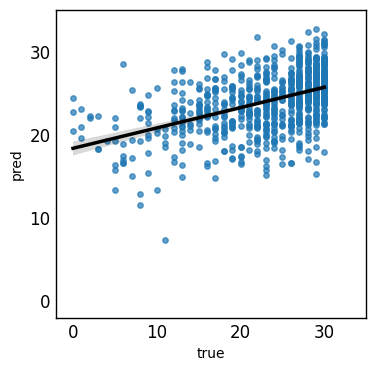

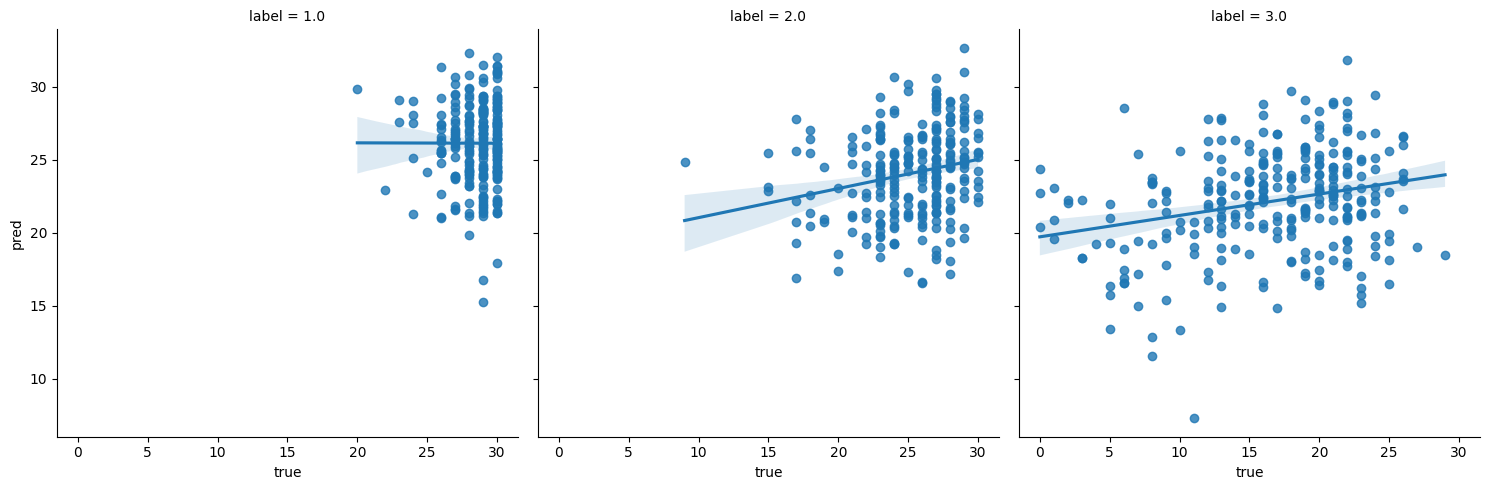

In [7]:
#画方法中prediction的示意图
r2_re = []
y_pred_3 = []
y_true_3 = []

r_list = []
p_list = []
mode = 0
#计算三种模态各个的分类性能
for mode in range(1):
    y_pred_mode = []
    y_true_mode = []
    label_mode = []
    #fig, ax = plt.subplots(figsize=(3, 3))
    #把fa和info合并成一个表格
    df_sc1= pd.concat([df_mode[mode],df_info],join="outer",axis=1)
    for i in range(7):
        center = i+1
        df = df_sc1.sample(frac=1).reset_index(drop=True)
        #df = df[df['label'] !=1]
        #df = df['label'].replace(3,0)
        
        #df.loc[df['label']==3,'label'] = 0

        label_mode.extend(df[df['center']== center]['label'].values)
        df_test = df[df['center']== center].drop(axis=1,columns=['center','label'])
        df_train = df[df['center'] != center].drop(axis=1,columns=['center','label'])
        
        y_test = df_test['mmse'].values
        y_train = df_train['mmse'].values
        x_test = df_test.drop(axis=1,columns=['mmse']).values
        x_train = df_train.drop(axis=1,columns=['mmse']).values

        
        model = SVR(C= 0.9, kernel= 'poly', degree=2)
        #model = linear_model.BayesianRidge()
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)

        y_pred_mode.extend(y_pred)
        y_true_mode.extend(y_test)
        
        r2_re.append(pearsonr(y_pred,y_test)[0])

    y_pred_3.append(y_pred_mode)
    y_true_3.append(y_true_mode)
    r_list.append(pearsonr(y_pred_mode,y_true_mode)[0])
    p_list.append(pearsonr(y_pred_mode,y_true_mode)[0])

    fig, ax = plt.subplots(figsize=(4, 4))

    df_y = pd.DataFrame( data= np.transpose([y_pred_mode,y_true_mode,label_mode]), columns=['pred','true','label'])
    

    sns.regplot(data= df_y, x='true',y= 'pred',
                line_kws={'linewidth':2.5,"color": "black"}, 
                #color="black",
                scatter_kws = {'s':15, 'alpha' : 0.7})
    
    modelName = str(model)

    #plt.scatter(y_true_mode,y_pred_mode)

    rp = pearsonr(y_pred_mode,y_true_mode)

    plt.xlim([-2,35])
    plt.ylim([-2,35])

    
    x_major_locator=MultipleLocator(10)
    #把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator=MultipleLocator(10)
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    ax.xticks = []
    ax.yticks = []
    print(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))
    #plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))

    plt.tick_params(labelsize=12,pad=4,length=0,width=1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)

    plt.show()
    sns.lmplot(data= df_y, x='true',y= 'pred',col= 'label')



